In [4]:
import torch
import numpy as np
from diffusers import StableDiffusionPipeline

In [2]:
from diffusers import DDIMScheduler

scheduler = DDIMScheduler(beta_start=0.00085,
                          beta_end=0.012,
                          beta_schedule="scaled_linear",
                          clip_sample=False,
                          set_alpha_to_one=False)

In [5]:
pipe = StableDiffusionPipeline.from_pretrained(
    "/home/bangbang/.cache/huggingface/hub/models--Crosstyan--BPModel/snapshots/dea2172f2fa1858444b14cc948c8cf0146592604/",
    torch_dtype=torch.float16, scheduler=scheduler)
pipe = pipe.to("cuda")

/home/bangbang/StableDiffusion/contribute/diffusers/src/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:100: FutureWarning: The configuration file of this scheduler: DDIMScheduler {
  "_class_name": "DDIMScheduler",
  "_diffusers_version": "0.13.0.dev0",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "set_alpha_to_one": false,
  "steps_offset": 0,
  "trained_betas": null
}
 is outdated. `steps_offset` should be set to 1 instead of 0. Please make sure to update the config accordingly as leaving `steps_offset` might led to incorrect results in future versions. If you have downloaded this checkpoint from the Hugging Face Hub, it would be very nice if you could open a Pull request for the `scheduler/scheduler_config.json` file
  deprecate("steps_offset!=1", "1.0.0", deprecation_message, standard_warn=False)


In [4]:
pipe.scheduler

DDIMScheduler {
  "_class_name": "DDIMScheduler",
  "_diffusers_version": "0.13.0.dev0",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "set_alpha_to_one": false,
  "steps_offset": 1,
  "trained_betas": null
}

In [134]:
seed = np.random.randint(1000000)
print(seed)

764305


In [6]:
seed = seed1 = 81004

In [7]:
generator = torch.Generator()
generator.manual_seed(seed)

In [8]:
prompt = "anime girl by fkey by fkey with beautiful eyes and brown hair, half-body, ink, oil painting, solo, 1girl, outdoors, 4K wallpaper"
negative_prompt = "worst quality, low quality, medium quality, deleted, lowres, comic, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, jpeg artifacts, signature, watermark, username, blurry"
output = pipe(prompt, negative_prompt=negative_prompt, generator=generator)
# pipe.enable_attention_slicing()
# image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

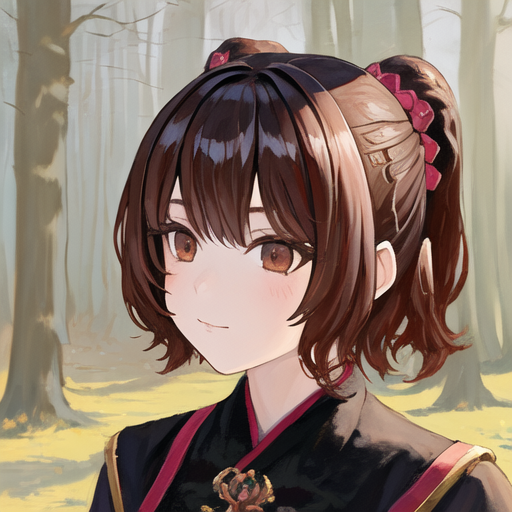

In [9]:
output.images[0]

In [138]:
output.images[0].save(f'example_images/img-txt2img-{seed}.png')

In [10]:
seed = seed2 = 764305

In [11]:
generator = torch.Generator()
generator.manual_seed(seed)

In [12]:
prompt = "anime girl outdoors by momoko by momoko with beautiful eyes and brown hair, half-body, ink, oil painting, solo, 1girl, outdoors, 4K wallpaper"
negative_prompt = "worst quality, low quality, medium quality, deleted, lowres, comic, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, jpeg artifacts, signature, watermark, username, blurry"
output2 = pipe(prompt, negative_prompt=negative_prompt, generator=generator)
# pipe.enable_attention_slicing()
# image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

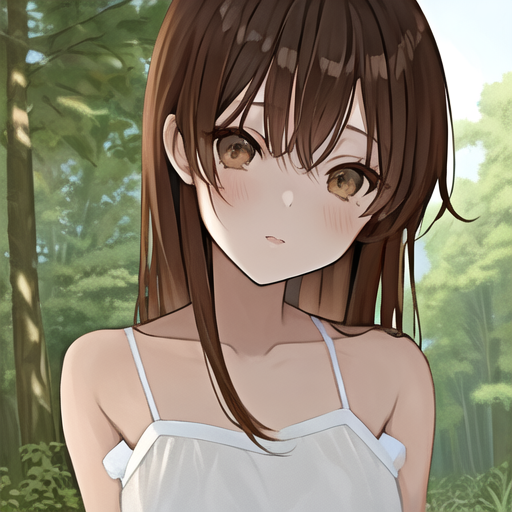

In [13]:
output2.images[0]

### I2I

In [86]:
from diffusers import StableDiffusionImg2ImgPipeline

In [87]:
pipei2i = StableDiffusionImg2ImgPipeline.from_pretrained(
    "/home/bangbang/.cache/huggingface/hub/models--Crosstyan--BPModel/snapshots/dea2172f2fa1858444b14cc948c8cf0146592604/",
    scheduler=scheduler)
pipei2i = pipei2i.to("cuda")

In [378]:
# response = requests.get(url)
# init_image = Image.open(BytesIO(response.content)).convert("RGB")
# init_image = init_image.resize((768, 512))

init_image = output2.images[0]

prompt = "2girls by fkey, yuri, gold hair, silver hair, simple background, 4K wallpaper"
negative_prompt = "momoko, worst quality, low quality, medium quality, deleted, lowres, comic, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, jpeg artifacts, signature, watermark, username, blurry"

denoise_strength = 0.5
guidance_scale = 8.5

outputi2i = pipei2i(prompt=prompt, negative_prompt=negative_prompt,
                    image=url_image, strength=denoise_strength, guidance_scale=guidance_scale)

  0%|          | 0/25 [00:00<?, ?it/s]

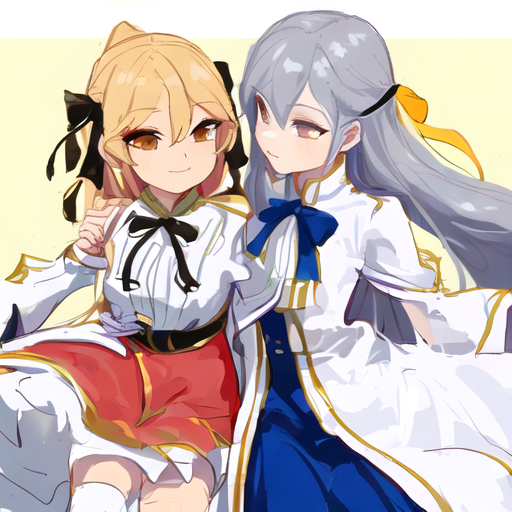

In [379]:
outputi2i.images[0]

In [377]:
rd = np.random.randint(1000)
outputi2i.images[0].save(f'example_images/{rd}-img-i2i-denoise{denoise_strength}-guidance{guidance_scale}-euphiani.png')

In [90]:
rd = np.random.randint(1000)
outputi2i.images[0].save(f'example_images/{rd}-img-i2i-denoise{denoise_strength}-guidance{guidance_scale}-{seed}.png')

### 2 images guidance

In [105]:
import requests
from PIL import Image
from io import BytesIO

In [121]:
url = "https://i.imgur.com/P6uqeCH.png"
response = requests.get(url)
url_image = Image.open(BytesIO(response.content)).convert("RGB")
url_image = url_image.resize((512, 512))

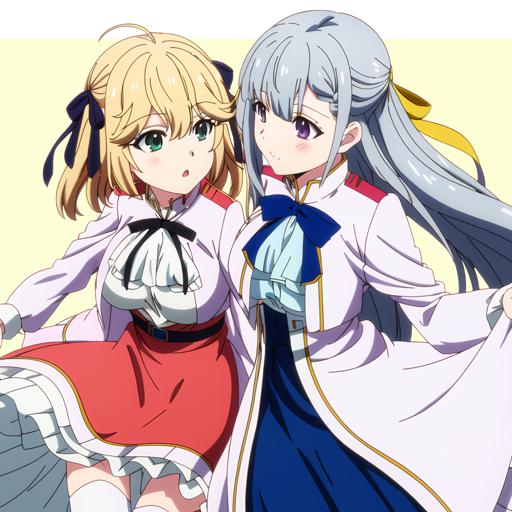

In [122]:
url_image

In [14]:
from diffusers import StableDiffusionPosteriorPipeline

In [180]:
pipepos = StableDiffusionPosteriorPipeline.from_pretrained(
    "/home/bangbang/.cache/huggingface/hub/models--Crosstyan--BPModel/snapshots/dea2172f2fa1858444b14cc948c8cf0146592604/",
    scheduler=scheduler)  #, torch_dtype=torch.float16)
pipepos = pipepos.to("cuda")

In [386]:
init_image = url_image
# image_to_match = output2.images[0]
image_to_match = url_image
wavelet_level = 2
denoise_strength = 0.5
guidance_scale = 8.5
match_weight = 1

prompt = "2girls with beautiful eyes by fkey, yuri, gold hair, silver hair, simple background, 4K wallpaper"
negative_prompt = "worst quality, low quality, medium quality, deleted, lowres, comic, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, jpeg artifacts, signature, watermark, username, blurry"

outputpos = pipepos(prompt=prompt, negative_prompt=negative_prompt,
                    image=init_image, strength=denoise_strength, guidance_scale=guidance_scale,
                    add_predicted_noise=True, wavelet_level=wavelet_level, image_to_match=image_to_match,
                    fill_with_zeros=False, match_high_frequency=False, match_weight=match_weight)

  0%|          | 0/25 [00:00<?, ?it/s]

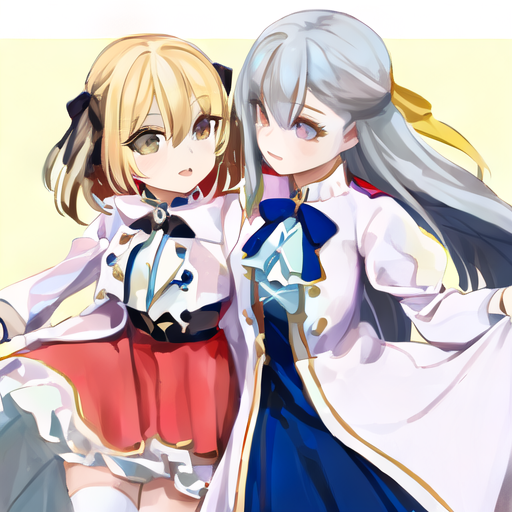

In [387]:
outputpos.images[0]

In [353]:
rd = np.random.randint(1000)
outputpos.images[0].save(f'example_images/{rd}-img-post-match-low-denoise{denoise_strength}-guidance{guidance_scale}-waveletlevel{wavelet_level}-euphiani-matchweight{match_weight}.png')

In [329]:
rd = np.random.randint(1000)
outputpos.images[0].save(f'example_images/{rd}-img-post-match-low-denoise{denoise_strength}-guidance{guidance_scale}-waveletlevel{wavelet_level}-euphiani-{seed1}-matchweight{match_weight}.png')

In [99]:
rd = np.random.randint(1000)
outputpos.images[0].save(f'example_images/{rd}-img-post-match-low-denoise{denoise_strength}-guidance{guidance_scale}-waveletlevel{wavelet_level}-{seed1}-matchweight{match_weight}-{seed2}.png')

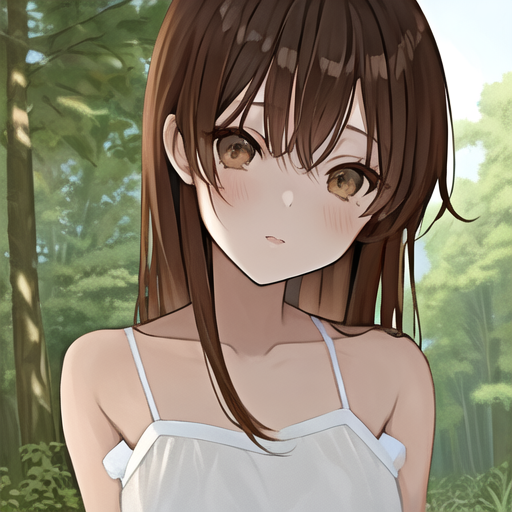

In [85]:
image_to_match

In [80]:
init_image = output.images[0]
image_to_match = output2.images[0]
wavelet_level = 2
denoise_strength = 0.7
guidance_scale = 9.5
match_weight = 0.5

prompt = "anime girl by fkey, twintail, solo, 1girl, cowboy shot, outdoors, 4K wallpaper"
negative_prompt = "fkey, worst quality, low quality, medium quality, deleted, lowres, comic, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, jpeg artifacts, signature, watermark, username, blurry"

outputpos = pipepos(prompt=prompt, negative_prompt=negative_prompt,
                    image=init_image, strength=denoise_strength, guidance_scale=guidance_scale,
                    add_predicted_noise=True, wavelet_level=wavelet_level, image_to_match=image_to_match,
                    fill_with_zeros=False, match_high_frequency=True, match_weight=match_weight)

  0%|          | 0/15 [00:00<?, ?it/s]

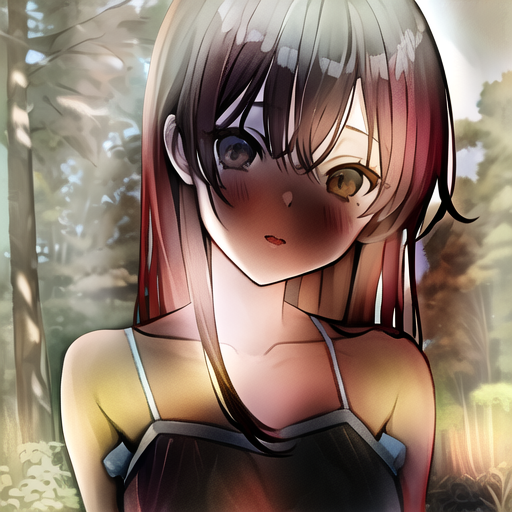

In [81]:
outputpos.images[0]

In [79]:
rd = np.random.randint(1000)
outputpos.images[0].save(f'example_images/{rd}-img-post-match-high-denoise{denoise_strength}-guidance{guidance_scale}-waveletlevel{wavelet_level}-{seed1}-matchweight{match_weight}-{seed2}.png')

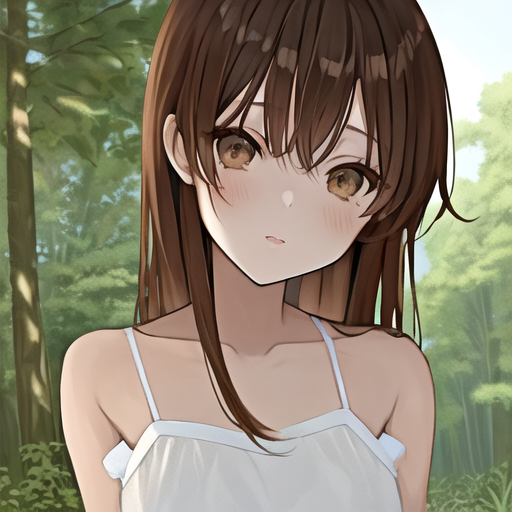

In [153]:
image_to_match

### Match frequency

In [11]:
from diffusers import StableDiffusionPosteriorPipeline

In [12]:
pipepos = StableDiffusionPosteriorPipeline.from_pretrained(
    "/home/bangbang/.cache/huggingface/hub/models--Crosstyan--BPModel/snapshots/dea2172f2fa1858444b14cc948c8cf0146592604/",
    scheduler=scheduler)  #, torch_dtype=torch.float16)
pipepos = pipepos.to("cuda")

In [108]:
init_image = output.images[0]
wavelet_level = 3
denoise_strength = 1
guidance_scale = 9.5

prompt = "anime girl by momoko, twintail, solo, 1girl, cowboy shot, outdoors, 4K wallpaper"
negative_prompt = "fkey, worst quality, low quality, medium quality, deleted, lowres, comic, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, jpeg artifacts, signature, watermark, username, blurry"

outputpos = pipepos(prompt=prompt, negative_prompt=negative_prompt,
                    image=init_image, strength=denoise_strength, guidance_scale=guidance_scale,
                    add_predicted_noise=True, wavelet_level=wavelet_level,
                    fill_with_zeros=False, match_high_frequency=False)

  0%|          | 0/50 [00:00<?, ?it/s]

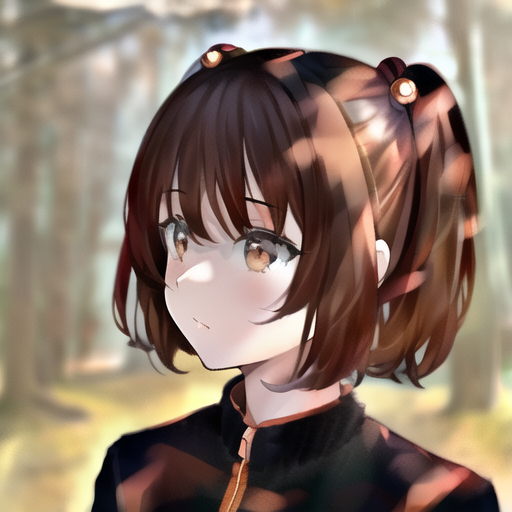

In [109]:
outputpos.images[0]

In [110]:
rd = np.random.randint(1000)
outputpos.images[0].save(f'example_images/{rd}-img-post-match-low-denoise{denoise_strength}-guidance{guidance_scale}-waveletlevel{wavelet_level}-{seed}.png')

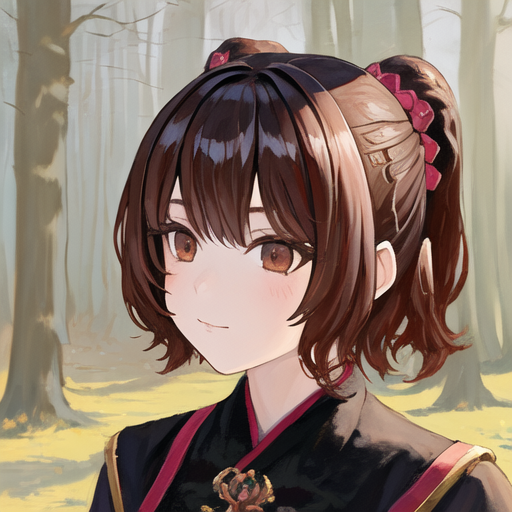

In [47]:
output.images[0]

In [99]:
init_image = output.images[0]
wavelet_level = 1
denoise_strength = 0.85
guidance_scale = 9.5

prompt = "anime girl by tabi, red hair, green eyes, solo, 1girl, cowboy shot, outdoors, 4K wallpaper"
negative_prompt = "black hair, fkey, worst quality, low quality, medium quality, deleted, lowres, comic, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, jpeg artifacts, signature, watermark, username, blurry"

outputpos = pipepos(prompt=prompt, negative_prompt=negative_prompt,
                    image=init_image, strength=denoise_strength, guidance_scale=guidance_scale,
                    add_predicted_noise=False, wavelet_level=wavelet_level,
                    fill_with_zeros=False, match_high_frequency=True)

  0%|          | 0/42 [00:00<?, ?it/s]

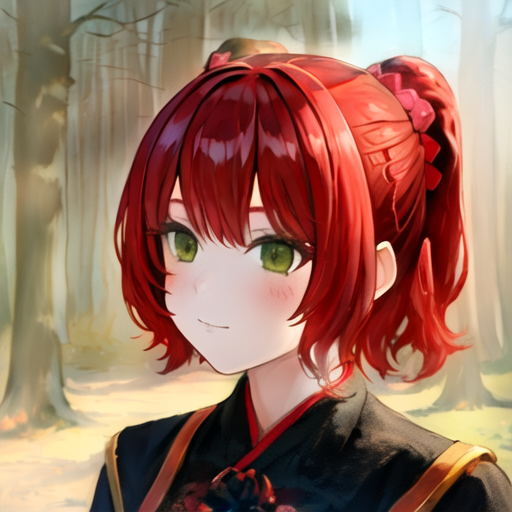

In [100]:
outputpos.images[0]

In [101]:
rd = np.random.randint(1000)
outputpos.images[0].save(f'example_images/{rd}-img-post-match-high-denoise{denoise_strength}-guidance{guidance_scale}-waveletlevel{wavelet_level}-{seed}.png')

In [19]:
init_image = output.images[0]
wavelet_level = 2

prompt = "anime girl by momoko, solo, 1girl, cowboy shot, outdoors, 4K wallpaper"
negative_prompt = "fkey, worst quality, low quality, medium quality, deleted, lowres, comic, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, jpeg artifacts, signature, watermark, username, blurry"

outputpos = pipepos(prompt=prompt, negative_prompt=negative_prompt,
                    image=init_image, strength=0.5, guidance_scale=9.5,
                    add_predicted_noise=False, wavelet_level=wavelet_level,
                    fill_with_zeros=True, match_high_frequency=True)

  0%|          | 0/25 [00:00<?, ?it/s]

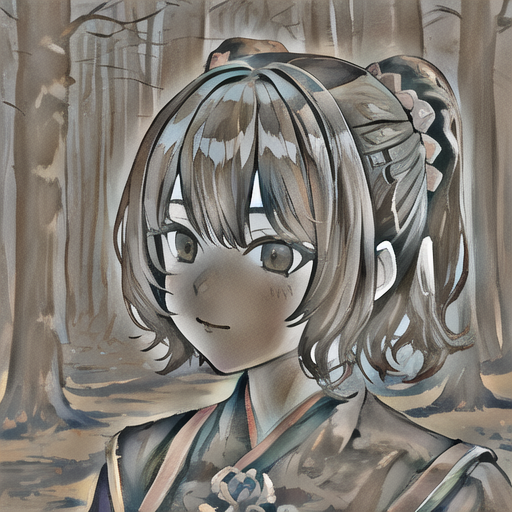

In [20]:
outputpos.images[0]

In [21]:
outputpos.images[0].save(f'example_images/img-post-high-frequency-waveletlevel{wavelet_level}-{seed}.png')

In [25]:
init_image = output.images[0]
wavelet_level = 1

prompt = "anime girl by momoko, solo, 1girl, cowboy shot, outdoors, 4K wallpaper"
negative_prompt = "fkey, worst quality, low quality, medium quality, deleted, lowres, comic, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, jpeg artifacts, signature, watermark, username, blurry"

outputpos = pipepos(prompt=prompt, negative_prompt=negative_prompt,
                    image=init_image, strength=0.5, guidance_scale=9.5,
                    add_predicted_noise=False, wavelet_level=wavelet_level,
                    fill_with_zeros=True, match_high_frequency=False)

  0%|          | 0/25 [00:00<?, ?it/s]

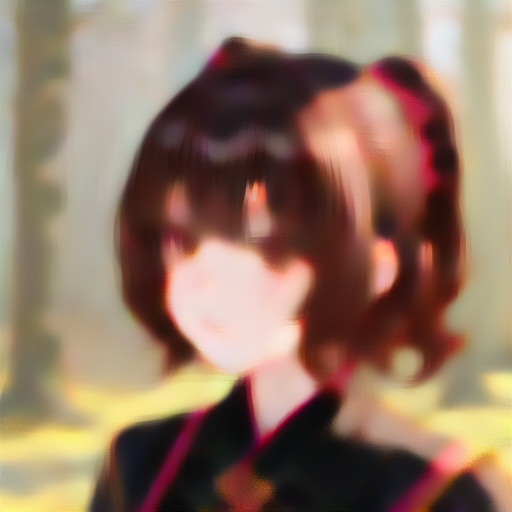

In [26]:
outputpos.images[0]

In [27]:
outputpos.images[0].save(f'example_images/img-post-low-frequency-waveletlevel{wavelet_level}-{seed}.png')

## Old

In [20]:
len(output[1])

50

In [59]:
import numpy as np

In [141]:
image_test = output[1][-1].cpu().permute(0, 2, 3, 1).numpy()

In [142]:
image_test.max()

3.3121345

In [143]:
image_test.min()

-3.9313245

In [144]:
pipe.vae.config.scaling_factor

0.18215

In [145]:
image_test_01 = (image_test+2)/4

In [146]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


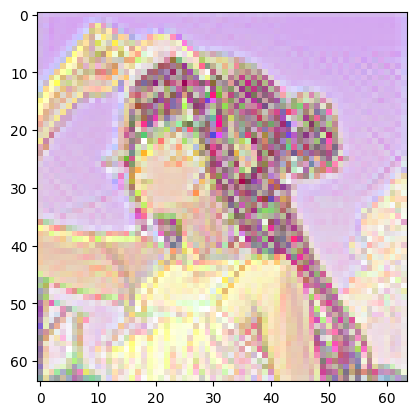

In [147]:
plt.imshow(image_test_01[0])

In [148]:
with torch.no_grad():
    vae_out = pipe.decode_latents(output[1][-30])

In [149]:
output[1][-1].shape

torch.Size([1, 4, 64, 64])

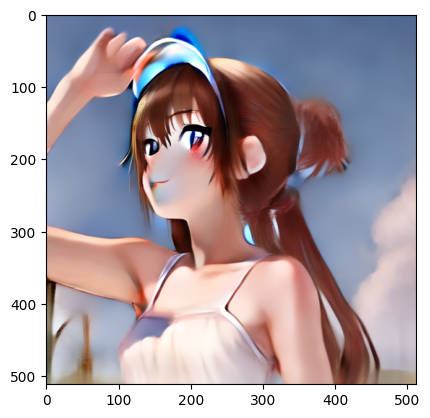

In [150]:
plt.imshow(vae_out[0])

In [151]:
vae_out.shape

(1, 512, 512, 3)

In [152]:
output_image = output[0].images[0]

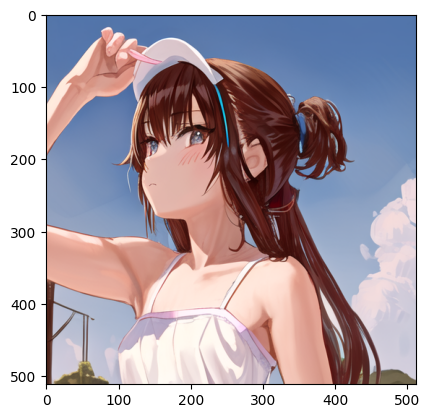

In [153]:
plt.imshow(output_image)

In [154]:
torch_image = torch.from_numpy((np.array(output_image).astype(np.float32)/255.0)[None].transpose(0, 3, 1, 2))
torch_image = 2*torch_image - 1

In [155]:
torch_image.shape

torch.Size([1, 3, 512, 512])

In [156]:
latent_dist = pipe.vae.encode(torch_image.cuda()).latent_dist

In [157]:
sampled_latent = latent_dist.sample() * 0.1825

In [158]:
sampled_latent.min()

tensor(-3.7374, device='cuda:0', grad_fn=<MinBackward1>)

In [159]:
with torch.no_grad():
    vae_out2 = pipe.decode_latents(sampled_latent)

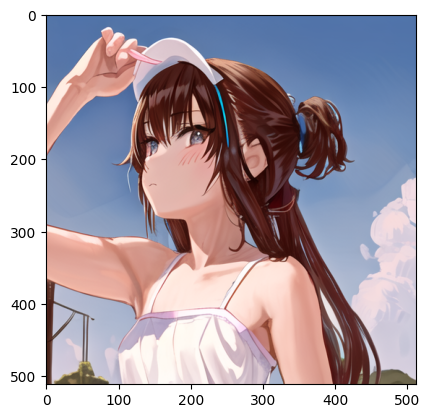

In [160]:
plt.imshow(vae_out2[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


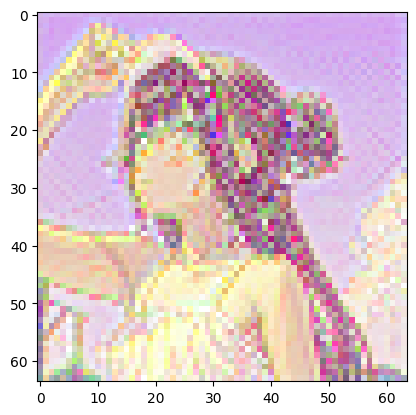

In [162]:
image_test2 = sampled_latent.cpu().detach().permute(0, 2, 3, 1).numpy()
plt.imshow((image_test2[0]+2)/4)

In [163]:
import pywt


In [175]:
image_test2.shape

(1, 64, 64, 4)

In [192]:
coeffs2 = pywt.dwt2(image_test2[0,:,:,0], 'db2')

In [193]:
LL, (LH, HL, HH) = coeffs2


In [194]:
LL.shape

(33, 33)

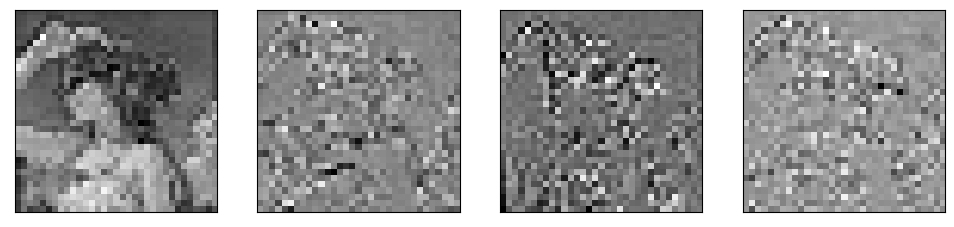

In [195]:
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_xticks([])
    ax.set_yticks([])

In [196]:
from pytorch_wavelets import DTCWTForward, DTCWTInverse

In [207]:
xfm = DTCWTForward(J=1, biort='near_sym_b', qshift='qshift_b').cuda()
Yl, Yh = xfm(sampled_latent)
ifm = DTCWTInverse(biort='near_sym_b', qshift='qshift_b').cuda()
Y = ifm((Yl, Yh))

In [208]:
Yl.shape

torch.Size([1, 4, 64, 64])

In [209]:
Yh[0].shape

torch.Size([1, 4, 6, 32, 32, 2])

In [210]:
with torch.no_grad():
    vae_out3 = pipe.decode_latents(Yl)

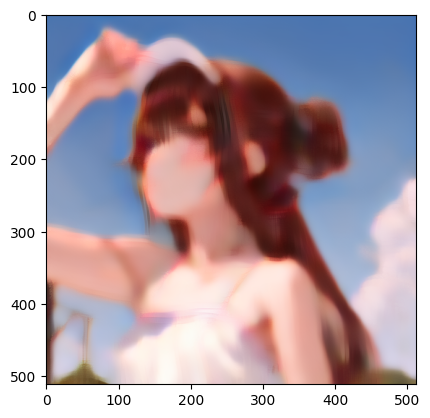

In [211]:
plt.imshow(vae_out3[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


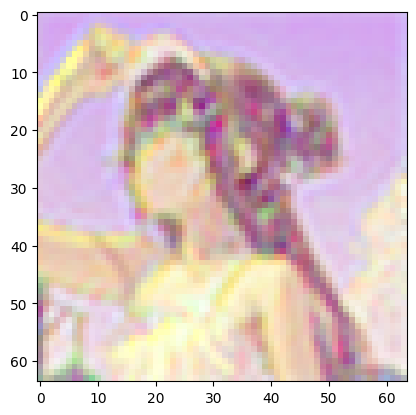

In [212]:
image_test3 = Yl.cpu().detach().permute(0, 2, 3, 1).numpy()
plt.imshow((image_test3[0]+2)/4)